In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import plotly.graph_objs as go
from plotly.offline import plot
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [ ]:
google = pd.read_csv('google.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
1,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
3,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044
4,2004-08-26,2.626376,2.701451,2.619119,2.700450,2.700450,141897960


In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4517 entries, 0 to 4516
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4517 non-null   object 
 1   Open       4517 non-null   float64
 2   High       4517 non-null   float64
 3   Low        4517 non-null   float64
 4   Close      4517 non-null   float64
 5   Adj Close  4517 non-null   float64
 6   Volume     4517 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 247.1+ KB


In [ ]:
google['Date'] = pd.to_datetime(google['Date'])

In [ ]:
print(f'Google Dateset Contains stock Price between {google.Date.min()} to  {google.Date.max()}')
print(f'Total Day = {(google.Date.max() - google.Date.min()).days} Days')

Google Dateset Contains stock Price between 2004-08-20 00:00:00 to  2022-07-29 00:00:00
Total Day = 6552 Days


In [ ]:
google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4517.000000,4517.000000,4517.000000,4517.000000,4517.000000,4.517000e+03
mean,36.265649,36.626408,35.886846,36.265749,36.265749,1.269836e+08
std,33.963870,34.318792,33.590393,33.963608,33.963608,1.524278e+08
min,2.482232,2.546046,2.475976,2.502753,2.502753,9.312000e+06
25%,12.532032,12.675175,12.387387,12.513263,12.513263,3.385200e+07
50%,22.185936,22.297297,22.044294,22.193193,22.193193,7.338254e+07
75%,52.500000,52.984501,51.792500,52.438499,52.438499,1.570788e+08
max,151.250000,151.546494,148.899002,149.838501,149.838501,1.643023e+09


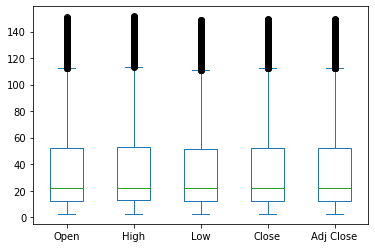

In [ ]:
google[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
layout = go.Layout(
     title='Google Stock Price',
     xaxis=dict(
     title='Date',
     titlefont=dict(
     family='Courier New, monospace',
     size=10,
     color='#7f7f7f'
     )
    ),
    yaxis=dict(
     title='Price',
     titlefont=dict(
     family='Courier New, monospace',
     size=10,
     color='#7f7f7f'
     )
    ) 
)    
google_data = [{'x':google['Date'],'y':google['Close']}]
plot = go.Figure(data=google_data, layout=layout)

In [ ]:

 iplot(plot)

In [ ]:
#Regression Model
from sklearn.model_selection import train_test_split

#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Evalution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
#splitting the data into Train and Test sets
X = np.array(google.index).reshape(-1,1)
Y = google['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [ ]:
#Feature Scaling
scaler = StandardScaler().fit(X_train)

In [ ]:
#liner Regression
from sklearn.linear_model import LinearRegression

In [ ]:
#creating a liner Model
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#plot Actual and Predicted values for Train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
google_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=google_data, layout=layout)

In [ ]:
iplot(plot2)

In [ ]:
#Calculate Score for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.7357897148760421	0.7406761939656101
MSE       307.44410606396934	288.2429314255529

